In [38]:
import os
import pandas as pd
os.chdir('C:/Users/mehra/Codes/KITS/SEM 5/Intro to Data Science/LAB/LAB EXAM PREP/DataSets/')
df = pd.read_csv('iris_EDA.csv')
df.head(2)

,sepallength,sepalwidth,petallength,petalwidth,class,Name,Score,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,F1,12.0,Red
1,4.9,3.0,1.4,0.2,Iris-setosa,F2,NaN,Blue


In [ ]:
1. Remove the irrelevant column 'Color' (inplace=True)

In [39]:
df.drop('Color', axis=1, inplace=True)
print(df.columns)

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class',
       'Name', 'Score'],
      dtype='object')


In [ ]:
2. Remove the duplicate rows and analyze

In [40]:
l = len(df)
df.drop_duplicates(inplace=True)
print('Duplicate rows removed', l - len(df))

Duplicate rows removed 1


In [ ]:
3. Rename the column class to Category

In [41]:
df.rename(columns={'class':'Category'}, inplace=True)
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'Category',
       'Name', 'Score'],
      dtype='object')

In [ ]:
4. Calculate the central tendency measures for 'Score'

In [42]:
print(round(df['Score'].mean()))
print(df['Score'].median())
print(df['Score'].mode())

21
22.0
0    12.0
1    21.0
2    22.0
3    24.0
4    25.0
5    27.0
Name: Score, dtype: float64


In [ ]:
5. Calculate the variability measures for 'Score'

In [43]:
print(round(df['Score'].std(),2))
print(round(df['Score'].var(),2))
print(df['Score'].min())
print(df['Score'].max())
print(df['Score'].max() - df['Score'].min())

5.73
32.86
11.0
30.0
19.0


In [ ]:
6. Calculate the IQR using quantile for 'Score'

In [44]:
IQR = df['Score'].quantile(0.75) - df['Score'].quantile(0.25)
print(IQR)

8.5


In [ ]:
7. Calculate the z-score for 'Score'

In [45]:
df['z-score'] = (df['Score'] - df['Score'].mean()) / df['Score'].std()
print(df['z-score'])

0    -1.562409
1          NaN
2    -0.515747
3    -1.213521
4     0.182028
5     1.054247
6     0.530916
7     0.356472
8    -0.864634
9    -0.341303
10    0.007585
11    0.705359
12    1.228690
13    1.403134
14   -1.736852
15    1.577578
16   -1.562409
17    0.530916
18   -0.690190
19   -1.039078
20    0.182028
21    1.054247
22    0.705359
23    0.007585
Name: z-score, dtype: float64


In [47]:
import scipy.stats as stats
df.dropna(inplace=True)
zscore = stats.zscore(df['Score'])
print(zscore)

0    -1.548765
2    -0.489506
3    -1.195679
4     0.216667
5     1.099383
6     0.569753
7     0.393210
8    -0.842592
9    -0.312963
10    0.040123
11    0.746296
12    1.275926
13    1.452469
14   -1.725308
15    1.629012
16   -1.548765
17    0.569753
18   -0.666049
19   -1.019136
20    0.216667
21    1.099383
23    0.040123
Name: Score, dtype: float64


In [ ]:
8. Add 2 rows at the end of the dataframe with the given values 
{'sepallength':7.6,'sepalwidth':2.9,'petallength':5.3,'petalwidth':2.1,'Category':'Irisvirginica','Name':'F25','Score':80}, 
{'sepallength': 4.6, 'sepalwidth': 1.3, 'petallength': 0.3, 'petalwidth': 1.7, 'Category': 'Iris-setosa', 'Name': 'F26', 'Score': 85}

In [158]:
new_rows = [{'sepallength': 7.6, 'sepalwidth': 2.9, 'petallength': 5.3, 'petalwidth': 2.1, 'Category': 'Iris-virginica', 'Name': 'F25', 'Score': 80},
            {'sepallength': 4.6, 'sepalwidth': 1.3, 'petallength': 0.3, 'petalwidth': 1.7, 'Category': 'Iris-setosa', 'Name': 'F26', 'Score': 85}]
for i in new_rows:
    df.loc[len(df)] = i
df.tail(2)

,sepallength,sepalwidth,petallength,petalwidth,Category,Name,Score,z-score
24,7.6,2.9,5.3,2.1,Iris-virginica,F25,80.0,NaN
25,4.6,1.3,0.3,1.7,Iris-setosa,F26,85.0,NaN


In [141]:
df[df['petalwidth'].isnull()]['petalwidth']

22   NaN
Name: petalwidth, dtype: float64

In [142]:
print(df['petalwidth'].loc[21:23])

21    2.1
22    NaN
23    1.8
Name: petalwidth, dtype: float64


In [ ]:
9. Replace nan value with give value (petalwidth =1.7)

In [128]:
df['petalwidth'].fillna(1.7, inplace=True)
print(df['petalwidth'].loc[21:23])

21    2.1
22    1.7
23    1.8
Name: petalwidth, dtype: float64


In [ ]:
10. Replace the nan value in petalwidth column with previous value, next value, linear interpolation and central tendency measures.

In [138]:
df['petalwidth'].fillna(method='bfill', inplace=True)
print(df['petalwidth'].loc[21:23])

21    2.1
22    1.8
23    1.8
Name: petalwidth, dtype: float64


In [136]:
df['petalwidth'].fillna(method='ffill', inplace=True)
print(df['petalwidth'].loc[21:23])

21    2.1
22    2.1
23    1.8
Name: petalwidth, dtype: float64


In [140]:
df['petalwidth'].interpolate(method='linear', inplace=True)
print(df['petalwidth'].loc[21:23])

21    2.10
22    1.95
23    1.80
Name: petalwidth, dtype: float64


In [159]:
df['petalwidth'].fillna(df['petalwidth'].mean(), inplace=True)
print(df['petalwidth'].loc[21:23])

21    2.100
22    1.248
23    1.800
Name: petalwidth, dtype: float64


In [ ]:
11. Detect the outliers in updated 'Score' with boxplot, scatter plot and histogram.

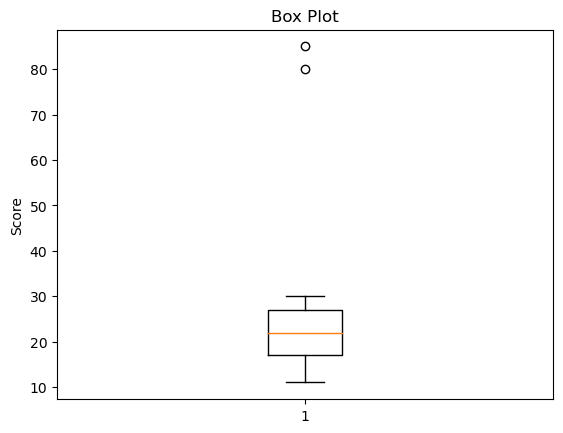

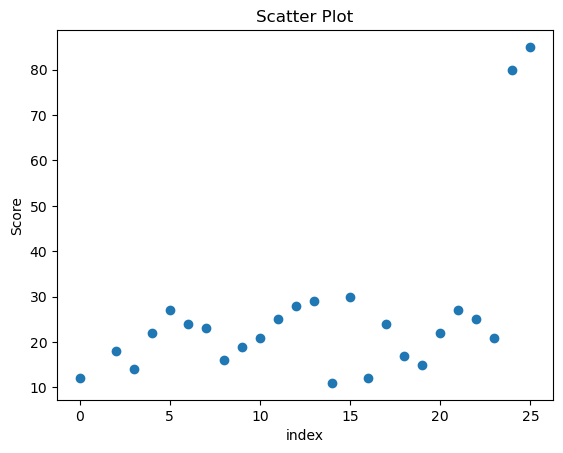

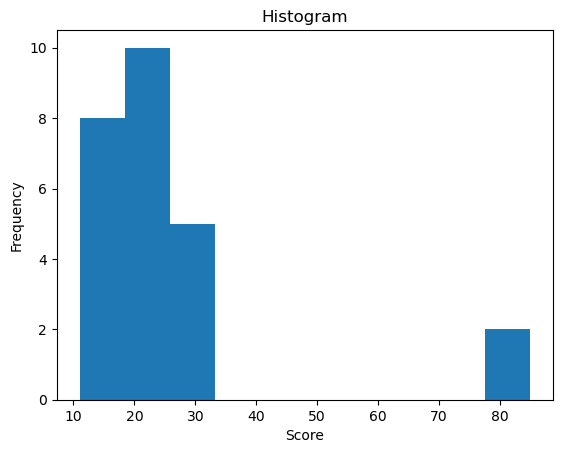

In [160]:
import matplotlib.pyplot as plt
plt.boxplot(df['Score'].dropna())
plt.ylabel('Score')
plt.title('Box Plot')
plt.show()

plt.scatter(df.index, df['Score'])
plt.xlabel('index')
plt.ylabel('Score')
plt.title('Scatter Plot')
plt.show()

plt.hist(df['Score'], bins=10)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [ ]:
12. Remove the outliers using IQR by recalculating IQR in updated 'Score' and analyse with boxplot

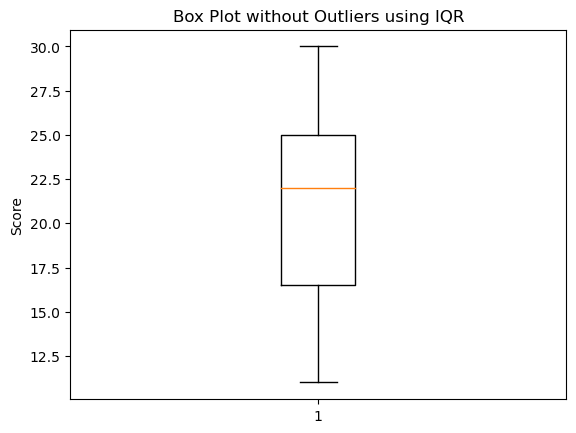

In [161]:
Q1 = df['Score'].quantile(0.25)
Q3 = df['Score'].quantile(0.75)
IQR = Q3-Q1
LB = Q1 - 1.5*IQR
UB = Q3 + 1.5*IQR
no_outlier_df = df[(df['Score']>=LB) & (df['Score']<=UB)]

plt.boxplot(no_outlier_df['Score'])
plt.ylabel('Score')
plt.title('Box Plot without Outliers using IQR')
plt.show()

In [ ]:
13. Remove the outliers using z-score by recalculating z-score in updated 'Score' and analyse with boxplot

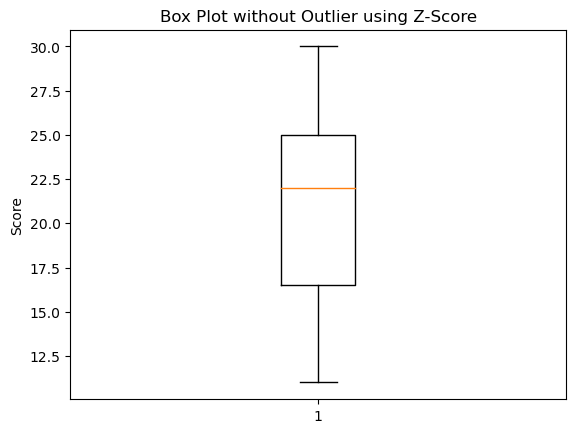

In [163]:
import numpy as np
no_outlier_z_df = df[np.abs(df['z-score']) <= 3]
plt.boxplot(no_outlier_z_df['Score'])
plt.ylabel('Score')
plt.title('Box Plot without Outlier using Z-Score')
plt.show()

In [ ]:
14. Plot the heatmap using the correlation

In [147]:
new_df = df.drop(['Category','Name'], axis=1)

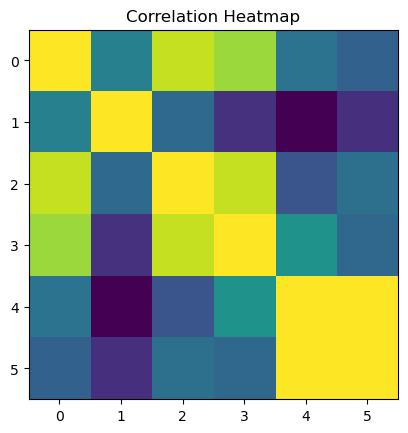

In [148]:
corr_matrix = new_df.corr()
plt.imshow(corr_matrix)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
15. Drop the last two rows added in the dataframe

In [111]:
df.drop(df.tail(2).index, inplace=True)
df.tail(2)

,sepallength,sepalwidth,petallength,petalwidth,Category,Name,Score,z-score
22,4.9,2.5,4.5,NaN,Iris-virginica,F23,25.0,21.344267
23,7.3,2.9,6.3,1.8,Iris-virginica,F24,21.0,17.344267
